Credit Card Customer Churn Prediction

Import Libs

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import dataset

In [66]:
df=pd.read_csv('Churn_Modelling.csv')

Head

In [67]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Value Counts

In [68]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [69]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Dummies for columns

In [70]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [71]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Drop unwanted Columns

In [72]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

Spliting the dataset

In [73]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
X_train.shape

(8000, 11)

Appling StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [76]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

Import tensorflow for deep learning 

In [77]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

Building model

In [78]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


Apply Compile method

In [80]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [81]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 0.6086 - accuracy: 0.7239 - val_loss: 0.5405 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 969us/step - loss: 0.5230 - accuracy: 0.7958 - val_loss: 0.5149 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 971us/step - loss: 0.5122 - accuracy: 0.7958 - val_loss: 0.5098 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 954us/step - loss: 0.5092 - accuracy: 0.7958 - val_loss: 0.5071 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 969us/step - loss: 0.5075 - accuracy: 0.7958 - val_loss: 0.5052 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 954us/step - loss: 0.5066 - accuracy: 0.7958 - val_loss: 0.5040 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 961us/step - loss: 0.5059 - accuracy: 0.7958 - val_loss: 0.5031 - val_accu

In [82]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 565us/step


In [83]:
y_pred = y_pred.argmax(axis=-1)

In [84]:
y_log=model.predict(X_test_trf)

63/63 [==============================] - 0s 565us/step


In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

In [86]:
history.history

{'loss': [0.6085842251777649,
  0.5230335593223572,
  0.5122209191322327,
  0.5091847777366638,
  0.507545530796051,
  0.5065869092941284,
  0.5058743953704834,
  0.5054824948310852,
  0.505265474319458,
  0.5050675868988037,
  0.5051019787788391,
  0.5050667524337769,
  0.5045971870422363,
  0.5047587156295776,
  0.5044885873794556,
  0.5044459700584412,
  0.5046281218528748,
  0.5045869946479797,
  0.5044758319854736,
  0.5044397115707397,
  0.5043068528175354,
  0.5044482946395874,
  0.5043790936470032,
  0.5047786235809326,
  0.5049002766609192,
  0.504916787147522,
  0.5051158666610718,
  0.5050625205039978,
  0.5051262974739075,
  0.5051170587539673,
  0.50514817237854,
  0.5051409006118774,
  0.5051114559173584,
  0.5050579309463501,
  0.5051504373550415,
  0.5050793290138245,
  0.5052342414855957,
  0.5051208734512329,
  0.5050944089889526,
  0.5052351951599121,
  0.505063533782959,
  0.5050647258758545,
  0.50505131483078,
  0.504981279373169,
  0.5049704909324646,
  0.5050774

Plot loss and val_loss graph for better understanding 

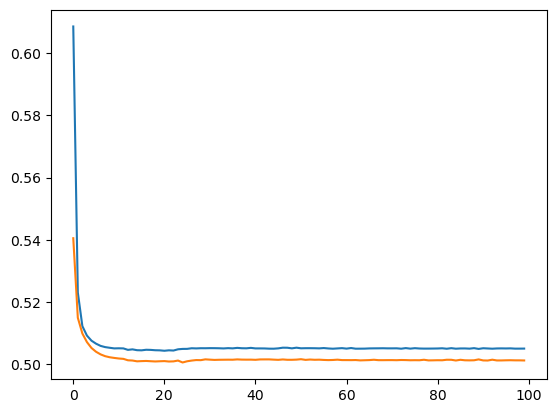

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Plot accuracy plot 

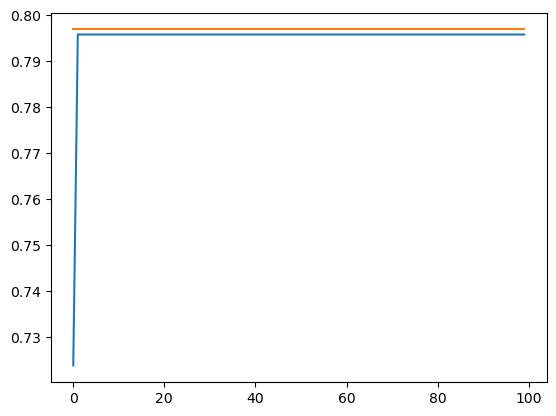

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [89]:
#End